In [8]:
import pandas as pd
import numpy as np
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
%matplotlib inline 
import warnings   # To ignore any warnings 
warnings.filterwarnings("ignore")

In [9]:
pd.set_option('display.max_columns',None) #to see all columns i.e ... option in large dataset gets eliminated
                                          #similarly we can do for rows

In [10]:
train_1 = pd.read_csv('F:/Bulldozer/Train/Train.csv')
test = pd.read_csv('F:/Bulldozer/Test.csv')
valid = pd.read_csv('F:/Bulldozer/Valid/Valid.csv')

In [11]:
train_1['extra']= 1
valid['extra']= 0
 #train= mergerd data of train_1(i.e original_train) and valid

In [12]:
train_1.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,extra
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,521D,521,D,NaN,NaN,NaN,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,1
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,950FII,950,F,II,NaN,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,23.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,1
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,226,226,NaN,NaN,NaN,NaN,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,PC120-6E,PC120,NaN,-6E,NaN,Small,"Hydraulic Excavator, Track - 12.0 to 14.0 Metr...",Texas,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,S175,S175,NaN,NaN,NaN,NaN,Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,EROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [13]:
train_1.shape

(401125, 54)

In [14]:
frames = [train_1, valid]   
train = pd.concat(frames) 
train.shape

(412698, 54)

In [15]:
test.shape

(12457, 52)

In [16]:
train_1_original=train.copy() 
test_original=test.copy()

In [17]:
train.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls', 'extra'],
      dtype='object')

In [18]:
test.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'saledate',
       'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
       'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
       'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
       'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
       'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
       'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [19]:
train.dtypes

SalesID                       int64
SalePrice                   float64
MachineID                     int64
ModelID                       int64
datasource                    int64
auctioneerID                float64
YearMade                      int64
MachineHoursCurrentMeter    float64
UsageBand                    object
saledate                     object
fiModelDesc                  object
fiBaseModel                  object
fiSecondaryDesc              object
fiModelSeries                object
fiModelDescriptor            object
ProductSize                  object
fiProductClassDesc           object
state                        object
ProductGroup                 object
ProductGroupDesc             object
Drive_System                 object
Enclosure                    object
Forks                        object
Pad_Type                     object
Ride_Control                 object
Stick                        object
Transmission                 object
Turbocharged                

In [20]:
train.shape,test.shape

((412698, 54), (12457, 52))

# Target Variable

In [21]:
train['SalePrice'].value_counts().sum()

401125

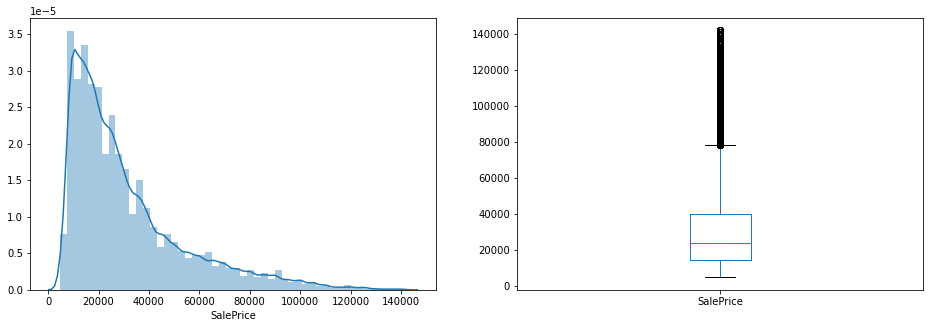

In [22]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['SalePrice']); 
plt.subplot(122) 
train['SalePrice'].plot.box(figsize=(16,5)) 
plt.show()

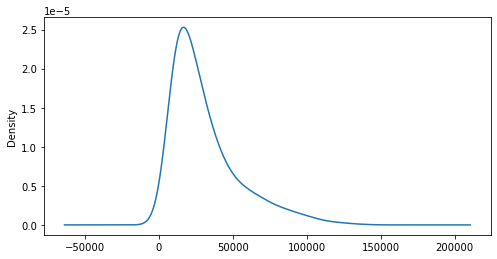

In [23]:
train['SalePrice'].plot.kde(figsize=(8,4),bw_method=0.3)


In [24]:
train.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,extra
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,521D,521,D,NaN,NaN,NaN,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,1
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,950FII,950,F,II,NaN,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,23.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,1
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,226,226,NaN,NaN,NaN,NaN,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,PC120-6E,PC120,NaN,-6E,NaN,Small,"Hydraulic Excavator, Track - 12.0 to 14.0 Metr...",Texas,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,S175,S175,NaN,NaN,NaN,NaN,Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,EROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [25]:
train.isnull().sum()

SalesID                          0
SalePrice                    11573
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

# Categorical Variables

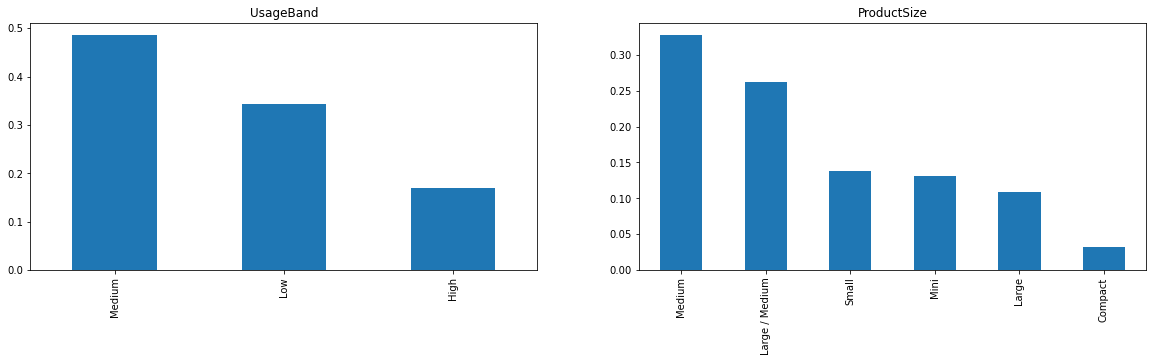

In [26]:
plt.figure(1)
plt.subplot(221)
train['UsageBand'].value_counts(normalize=True).plot.bar(title= 'UsageBand',figsize=(20,10))
plt.subplot(222)
train['ProductSize'].value_counts(normalize=True).plot.bar( title= 'ProductSize')
plt.show()

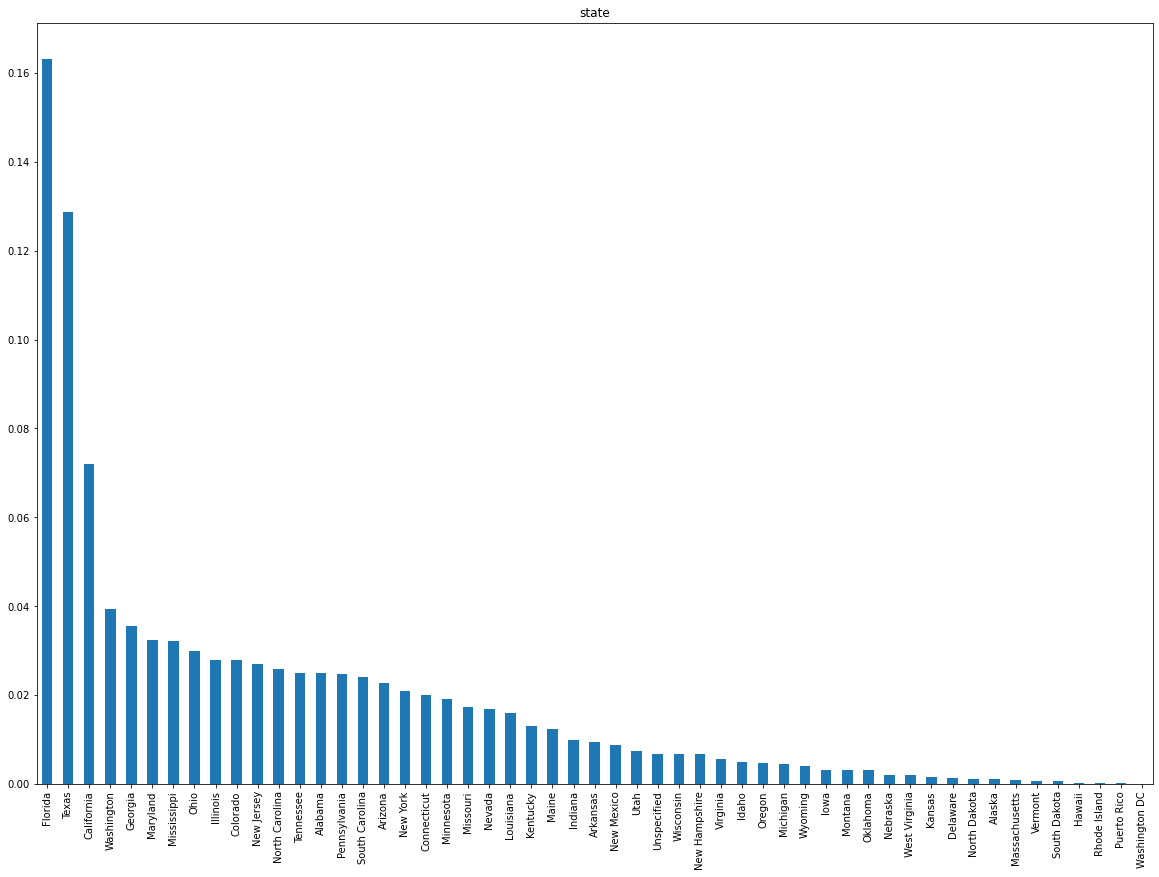

In [27]:
train['state'].value_counts(normalize=True).plot.bar(title= 'state',figsize=(20,14)) 

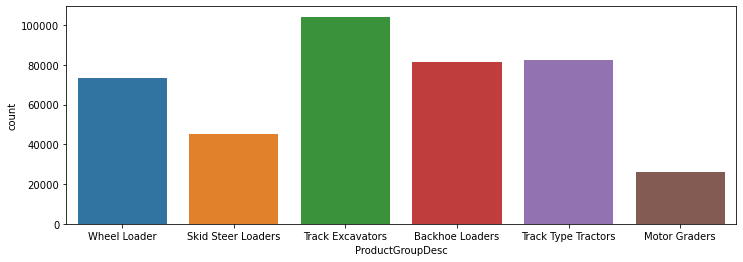

In [28]:
plt.figure(figsize=(12,4))
sns.countplot(x='ProductGroupDesc', data=train)

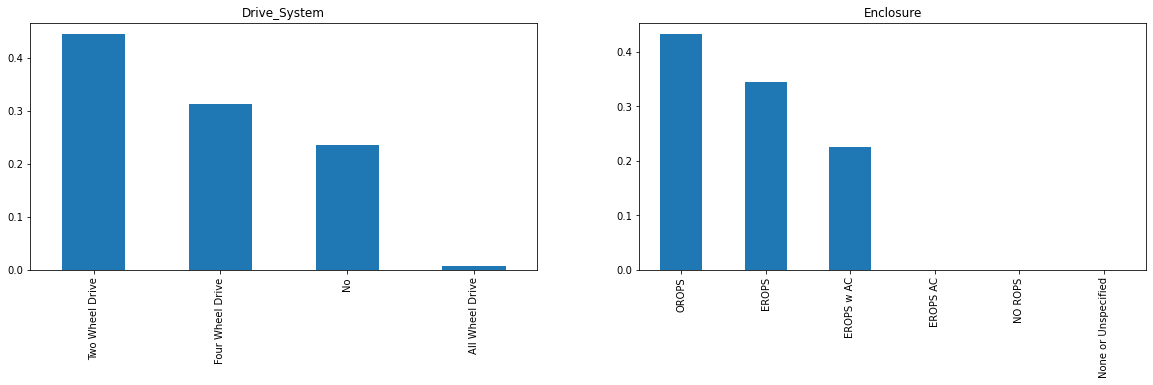

In [29]:
plt.figure(1)
plt.subplot(221)
train['Drive_System'].value_counts(normalize=True).plot.bar(title= 'Drive_System',figsize=(20,10))
plt.subplot(222)
train['Enclosure'].value_counts(normalize=True).plot.bar(title= 'Enclosure') 

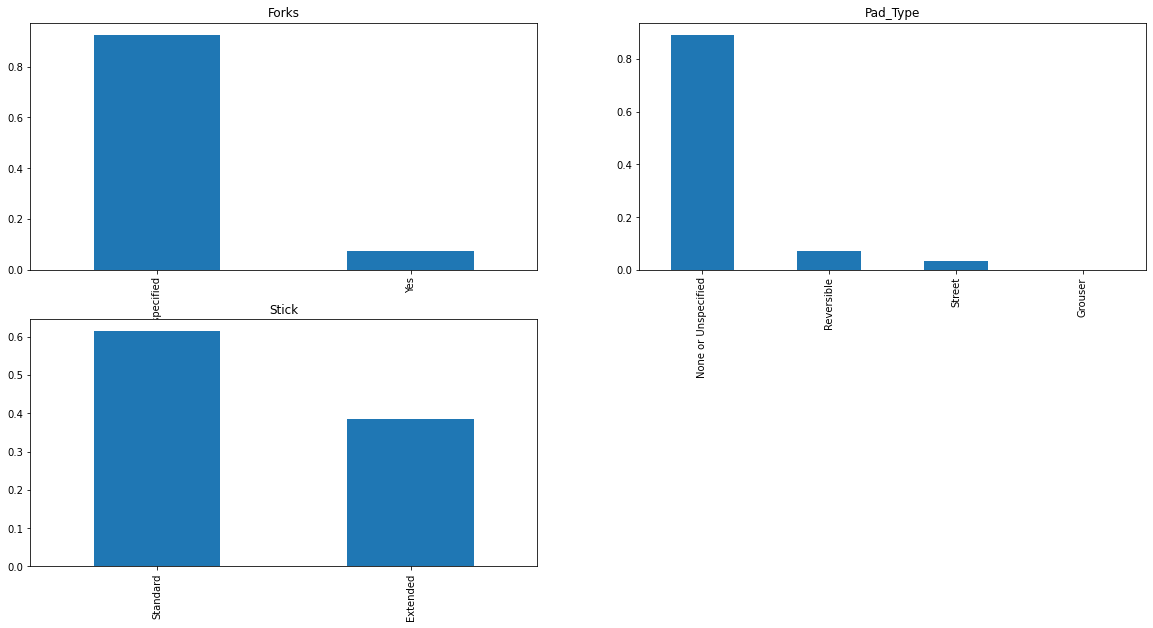

In [30]:
plt.figure(1)
plt.subplot(221)
train['Forks'].value_counts(normalize=True).plot.bar(title= 'Forks',figsize=(20,10))
plt.subplot(222)
train['Pad_Type'].value_counts(normalize=True).plot.bar(title= 'Pad_Type')
plt.subplot(223)
train['Stick'].value_counts(normalize=True).plot.bar(title= 'Stick') 

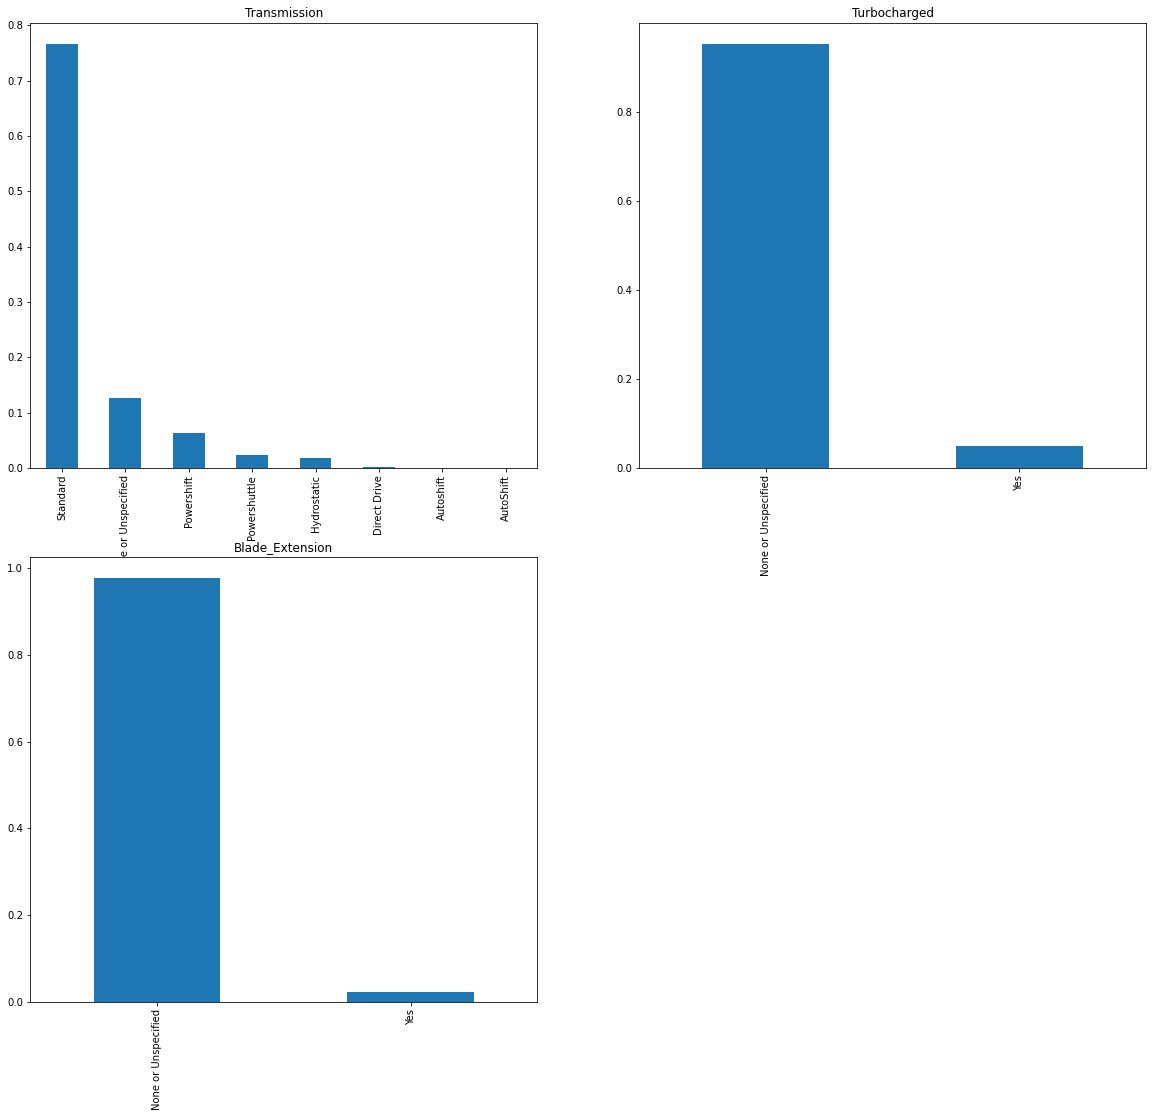

In [31]:
plt.figure(1)
plt.subplot(221)
train['Transmission'].value_counts(normalize=True).plot.bar(title= 'Transmission',figsize=(20,18))
plt.subplot(222)
train['Turbocharged'].value_counts(normalize=True).plot.bar(title= 'Turbocharged')
plt.subplot(223)
train['Blade_Extension'].value_counts(normalize=True).plot.bar(title= 'Blade_Extension')

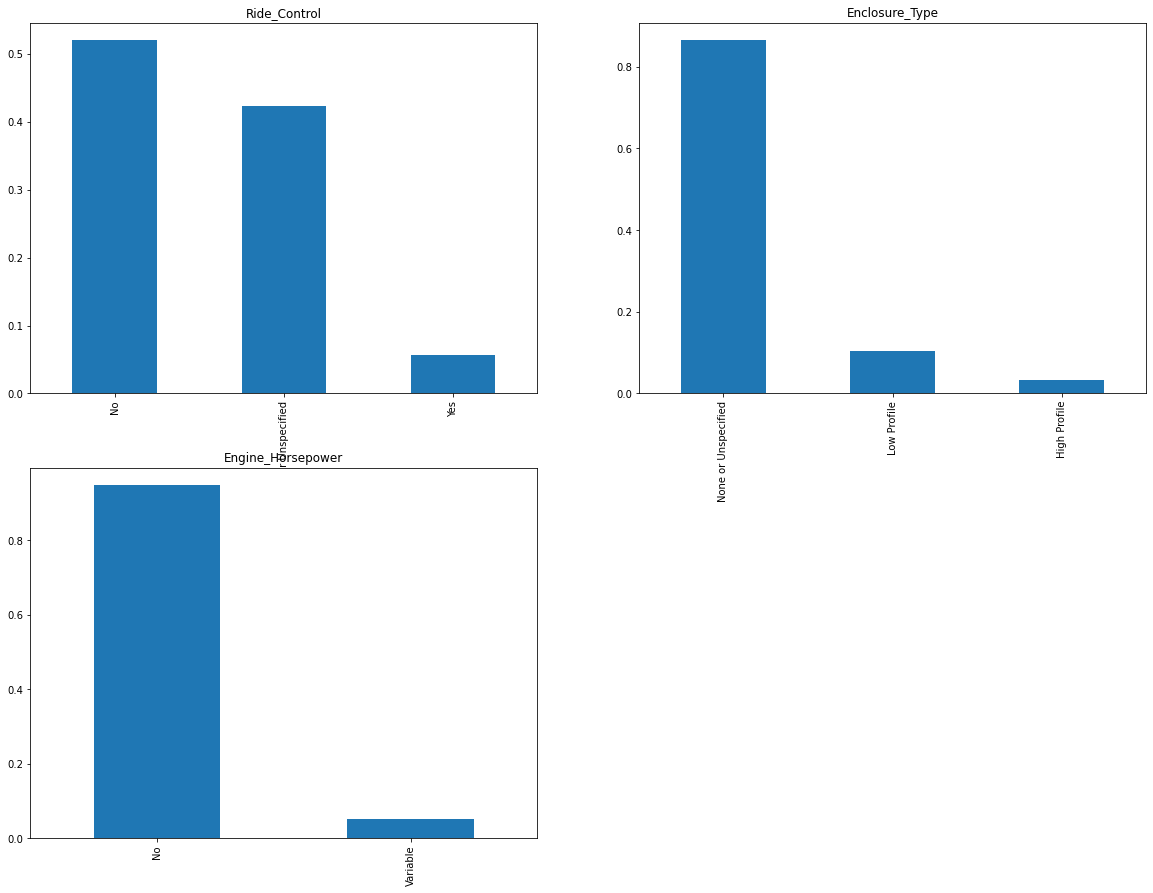

In [32]:
plt.figure(1)
plt.subplot(221)
train['Ride_Control'].value_counts(normalize=True).plot.bar(title= 'Ride_Control',figsize=(20,15))
plt.subplot(222)
train['Enclosure_Type'].value_counts(normalize=True).plot.bar(title= 'Enclosure_Type') 
plt.subplot(223)
train['Engine_Horsepower'].value_counts(normalize=True).plot.bar(title= 'Engine_Horsepower') 

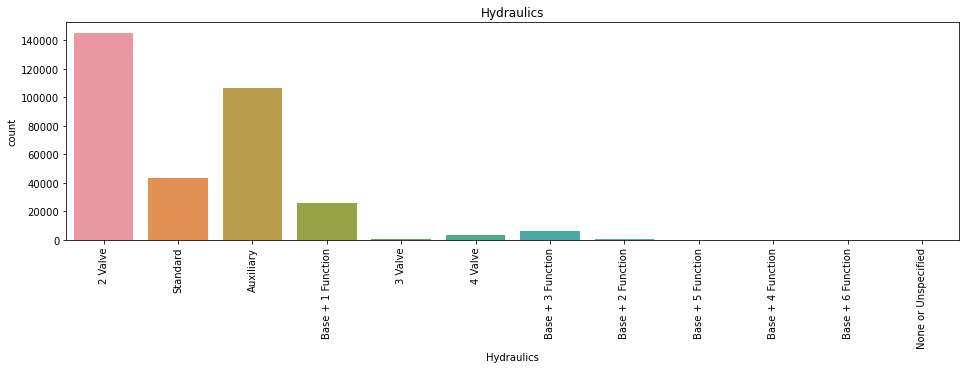

In [33]:
plt.figure(figsize=(16,4))
sns.countplot(x='Hydraulics', data=train)
train['Hydraulics'].value_counts(normalize=True).plot.bar(title= 'Hydraulics') 

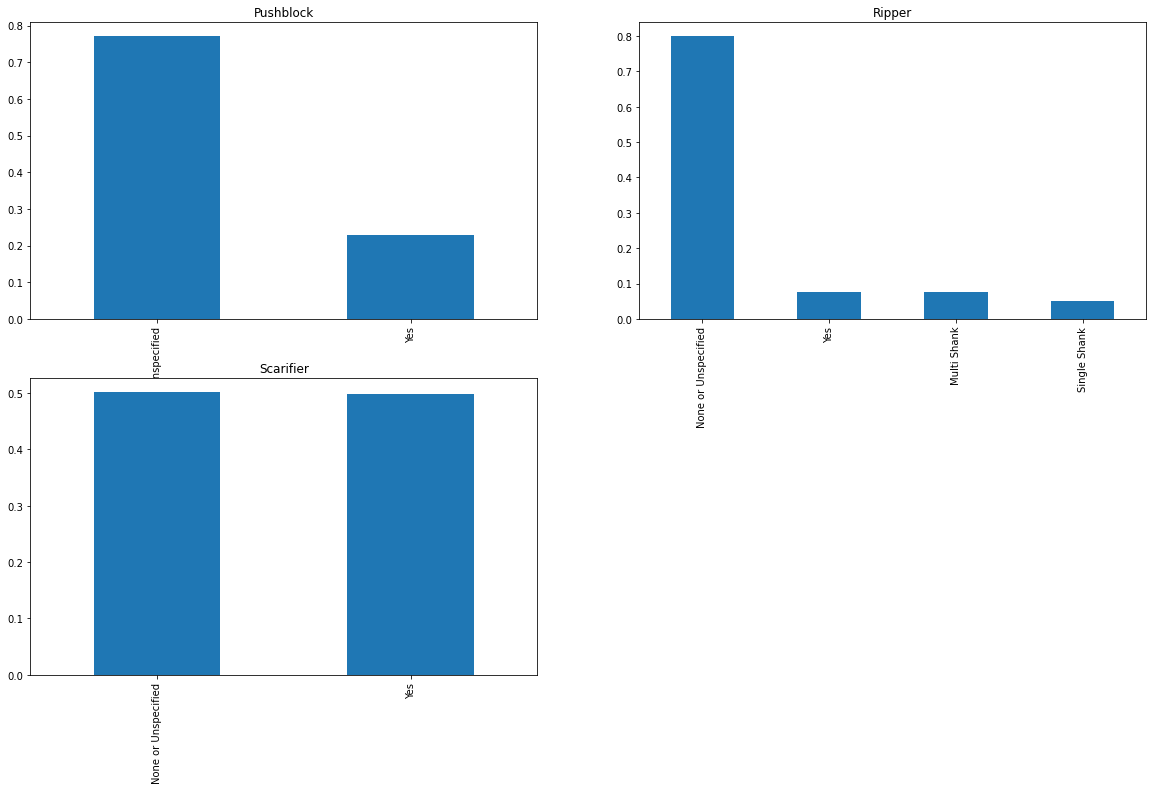

In [34]:
plt.figure(1)
plt.subplot(221)
train['Pushblock'].value_counts(normalize=True).plot.bar(title= 'Pushblock',figsize=(20,12)) 
plt.subplot(222) 
train['Ripper'].value_counts(normalize=True).plot.bar(title= 'Ripper')
plt.subplot(223)
train['Scarifier'].value_counts(normalize=True).plot.bar(title= 'Scarifier') 

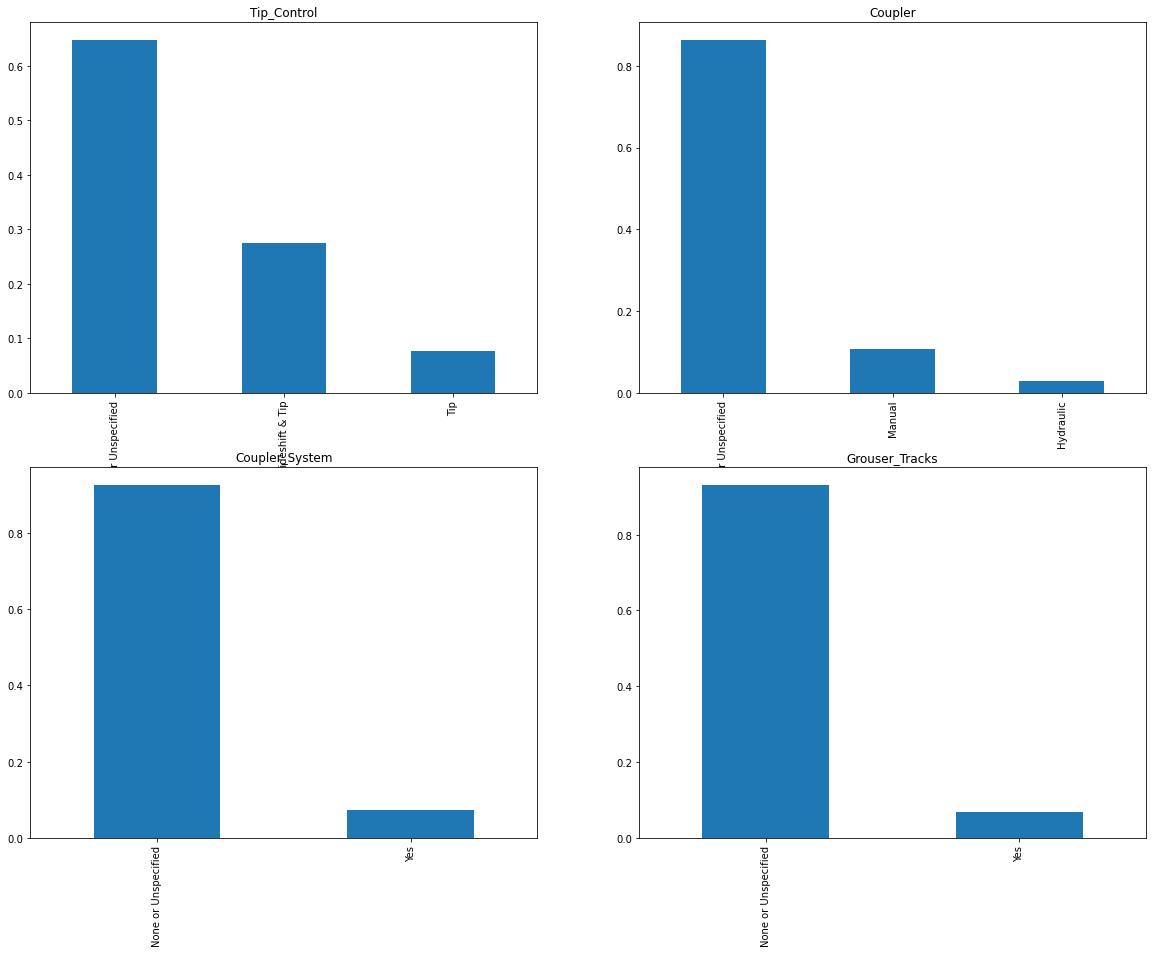

In [35]:
plt.figure(1)
plt.subplot(221)
train['Tip_Control'].value_counts(normalize=True).plot.bar(title= 'Tip_Control',figsize=(20,15)) 
plt.subplot(222)
train['Coupler'].value_counts(normalize=True).plot.bar(title= 'Coupler')
plt.subplot(223)
train['Coupler_System'].value_counts(normalize=True).plot.bar(title= 'Coupler_System')
plt.subplot(224)
train['Grouser_Tracks'].value_counts(normalize=True).plot.bar(title= 'Grouser_Tracks')

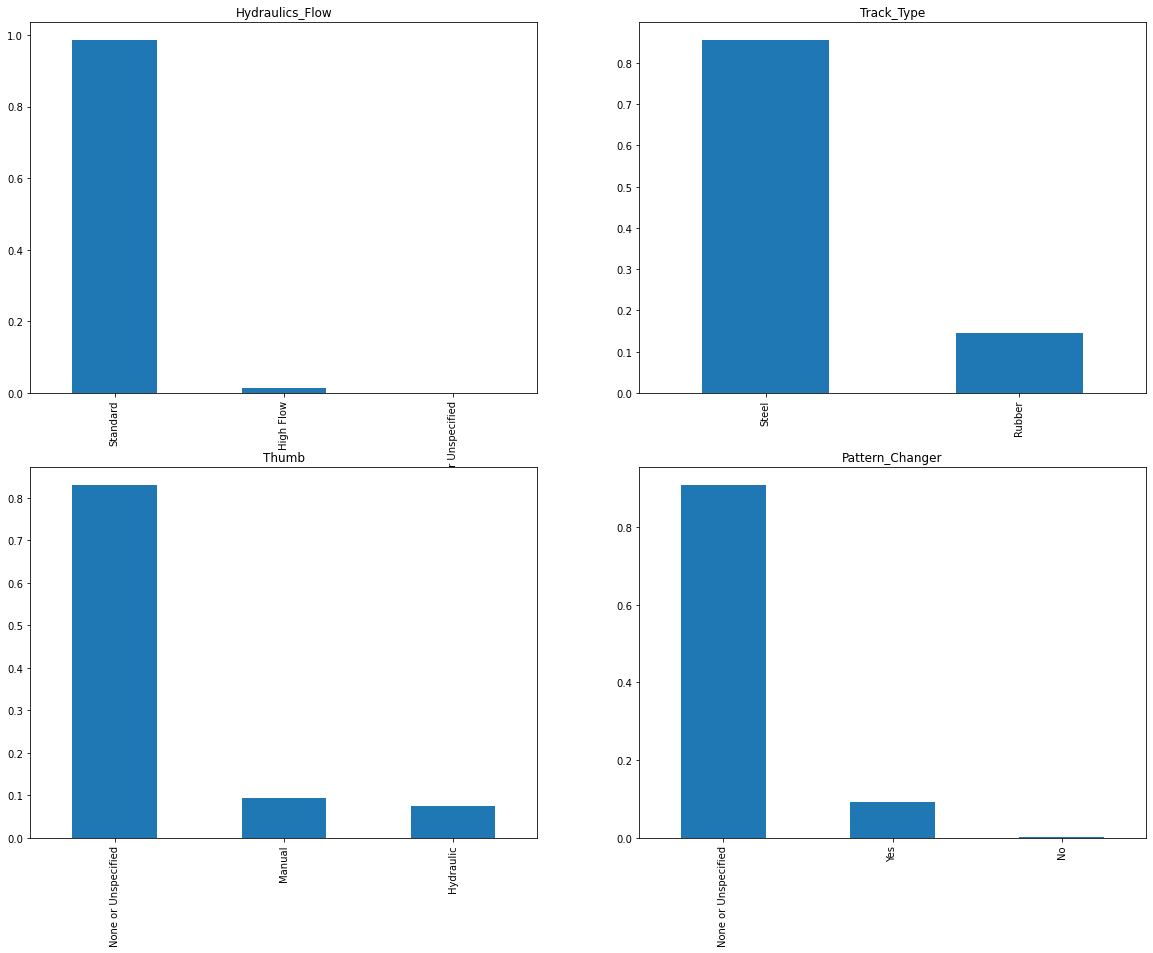

In [36]:
plt.figure(1)
plt.subplot(221)
train['Hydraulics_Flow'].value_counts(normalize=True).plot.bar(title= 'Hydraulics_Flow',figsize=(20,15))
plt.subplot(222)
train['Track_Type'].value_counts(normalize=True).plot.bar(title= 'Track_Type')
plt.subplot(223)
train['Thumb'].value_counts(normalize=True).plot.bar(title= 'Thumb')
plt.subplot(224)
train['Pattern_Changer'].value_counts(normalize=True).plot.bar(title= 'Pattern_Changer')

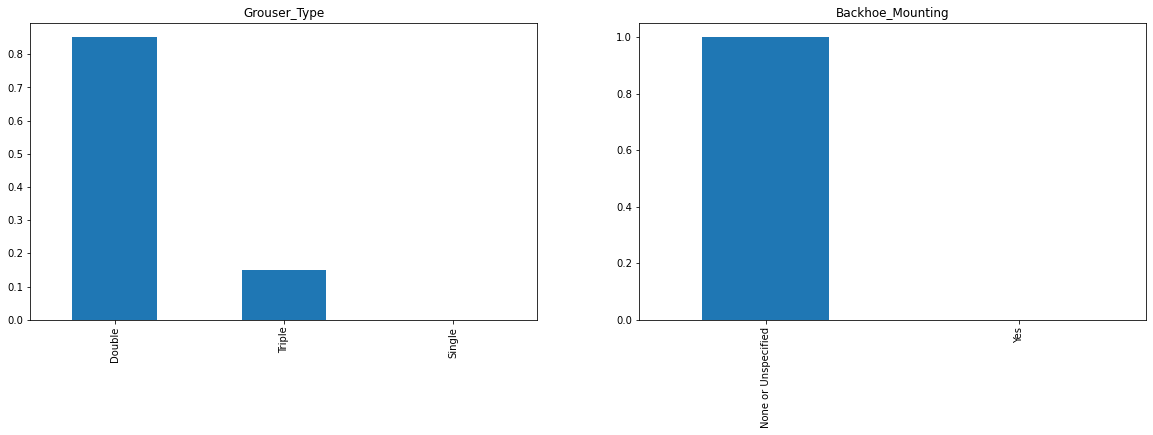

In [37]:
plt.figure(1)
plt.subplot(221)
train['Grouser_Type'].value_counts(normalize=True).plot.bar(title= 'Grouser_Type',figsize=(20,12))
plt.subplot(222)
train['Backhoe_Mounting'].value_counts(normalize=True).plot.bar(title= 'Backhoe_Mounting')


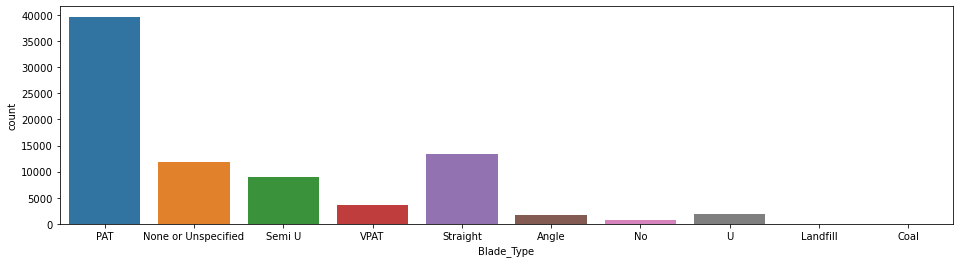

In [38]:
plt.figure(figsize=(16,4))
sns.countplot(x='Blade_Type', data=train)

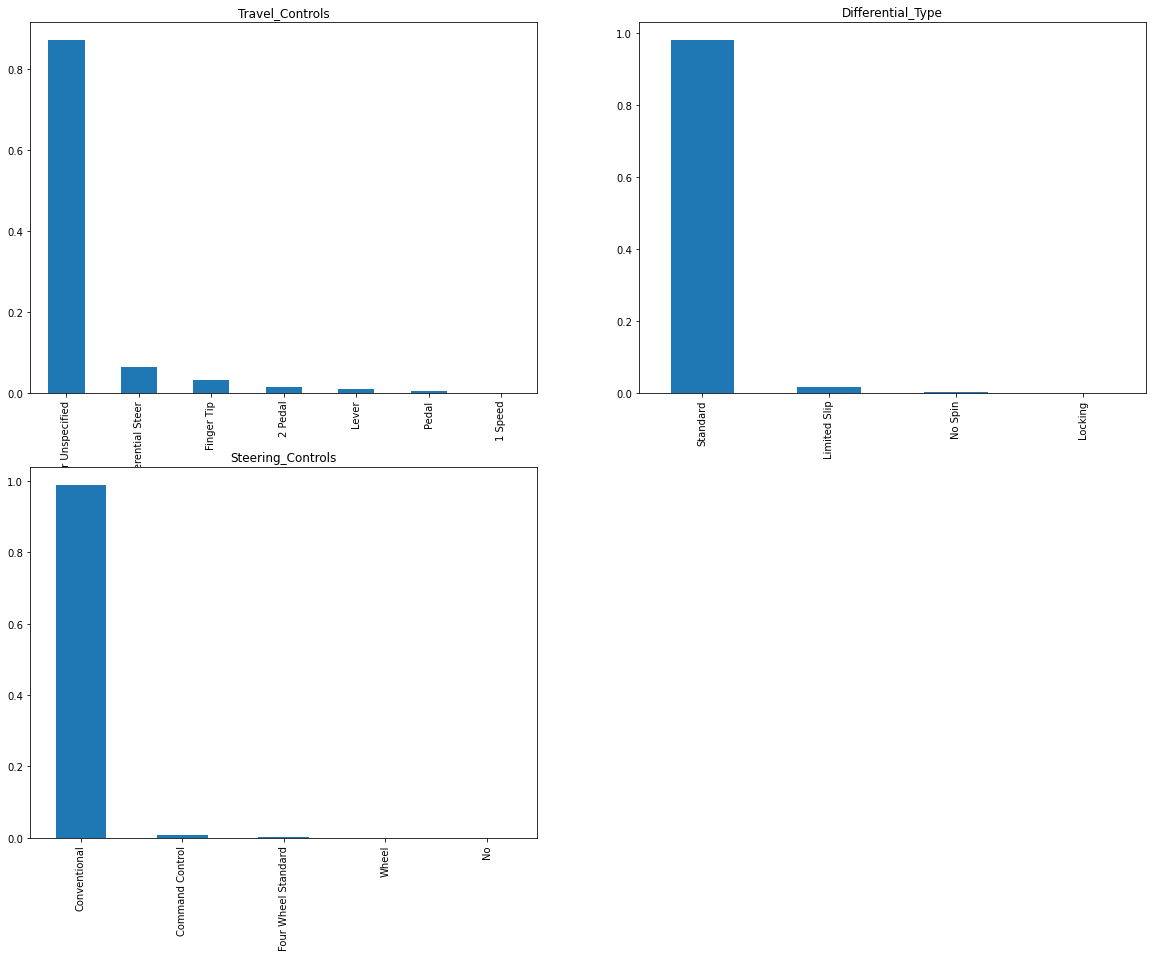

In [39]:
plt.figure(1)
plt.subplot(221)
train['Travel_Controls'].value_counts(normalize=True).plot.bar(title= 'Travel_Controls',figsize=(20,15))
plt.subplot(222)
train['Differential_Type'].value_counts(normalize=True).plot.bar(title= 'Differential_Type')
plt.subplot(223)
train['Steering_Controls'].value_counts(normalize=True).plot.bar(title= 'Steering_Controls')

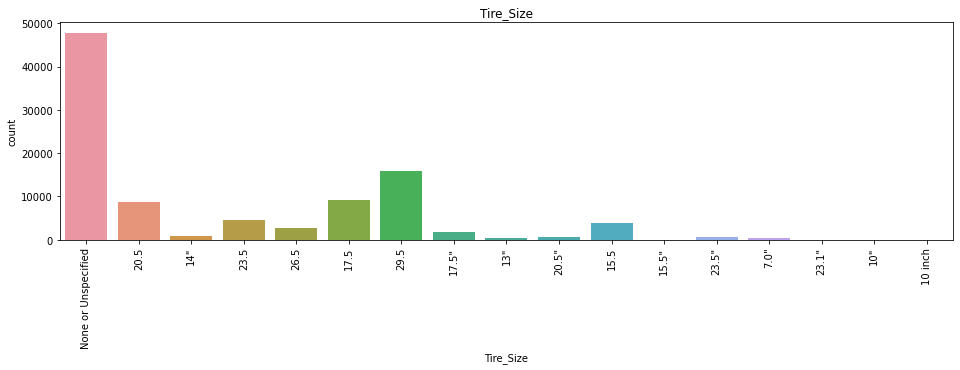

In [40]:
plt.figure(figsize=(16,4))
sns.countplot(x='Tire_Size', data=train)
train['Tire_Size'].value_counts(normalize=True).plot.bar(title= 'Tire_Size')

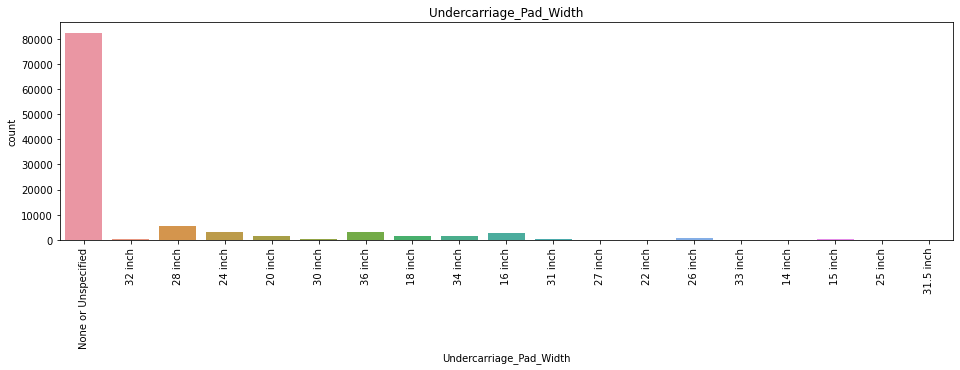

In [41]:
plt.figure(figsize=(16,4))
sns.countplot(x='Undercarriage_Pad_Width', data=train)
train['Undercarriage_Pad_Width'].value_counts(normalize=True).plot.bar(title= 'Undercarriage_Pad_Width')

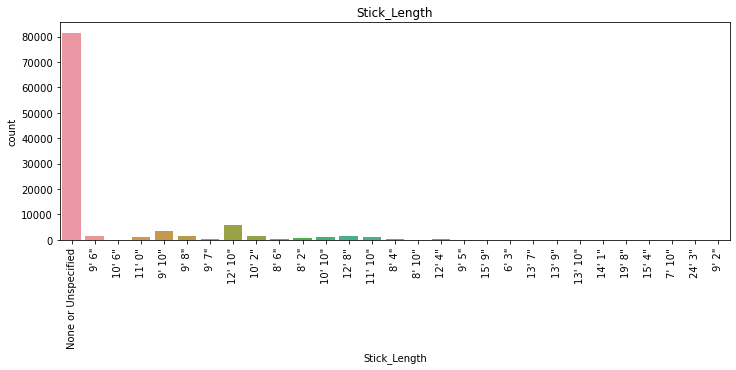

In [42]:
plt.figure(figsize=(20,10))
sns.countplot(x='Stick_Length', data=train)
train['Stick_Length'].value_counts(normalize=True).plot.bar(title= 'Stick_Length',figsize=(12,4))

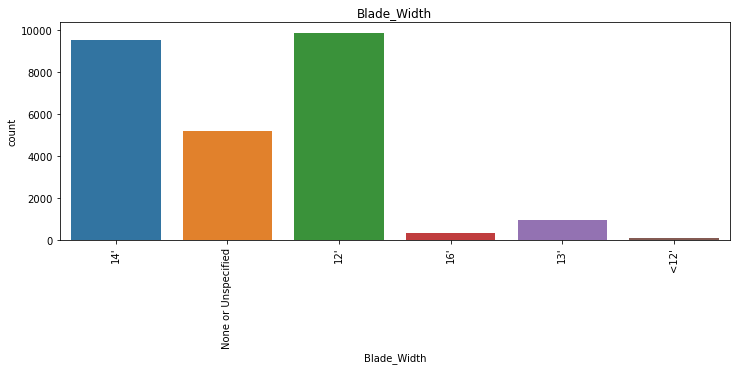

In [43]:
plt.figure(figsize=(12,4))
sns.countplot(x='Blade_Width', data=train)
train['Blade_Width'].value_counts(normalize=True).plot.bar(title= 'Blade_Width') 

# Numerical Variables

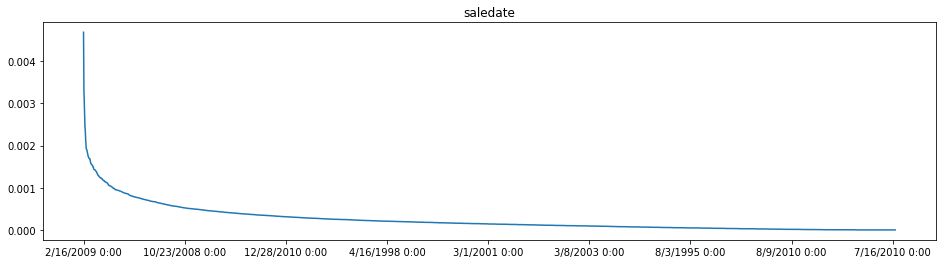

In [44]:
train['saledate'].value_counts(normalize=True).plot.line(figsize=(16,4),title= 'saledate')

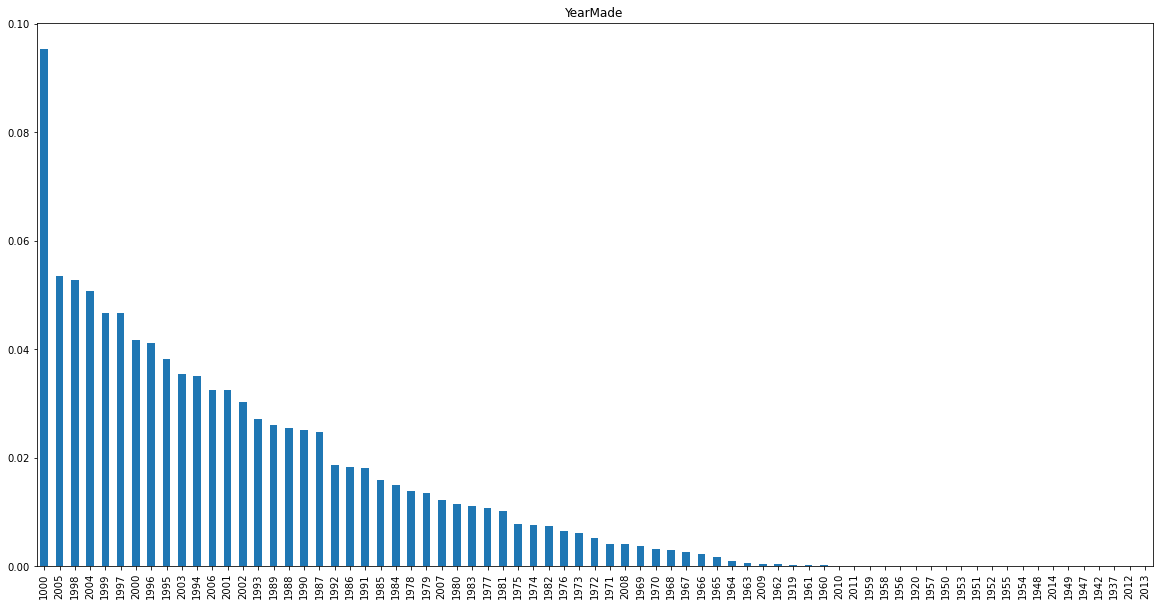

In [45]:
train['YearMade'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'YearMade') 

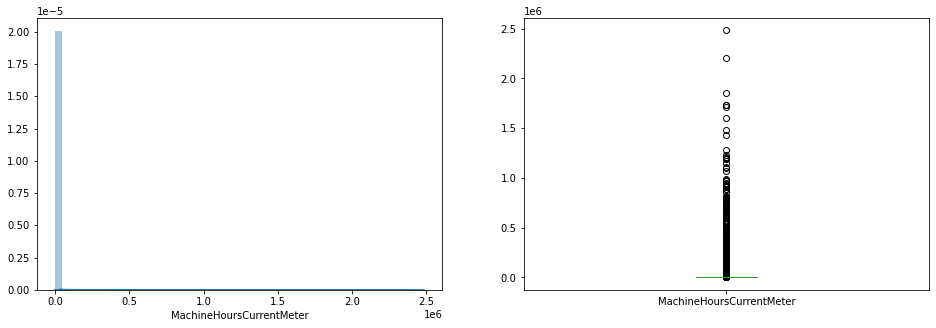

In [46]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['MachineHoursCurrentMeter']); 
plt.subplot(122) 
train['MachineHoursCurrentMeter'].plot.box(figsize=(16,5)) 
plt.show()

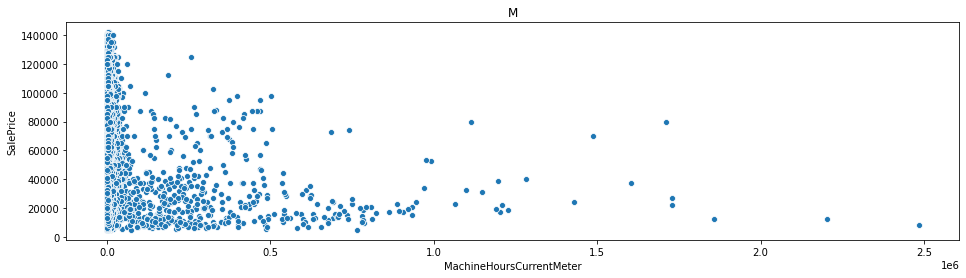

In [47]:
plt.figure(figsize=(16,4))
plt.title('M')
plt.xlabel('MachineHoursCurrentMeter')
plt.ylabel('SalePrice')
sns.scatterplot(train['MachineHoursCurrentMeter'],train['SalePrice'])

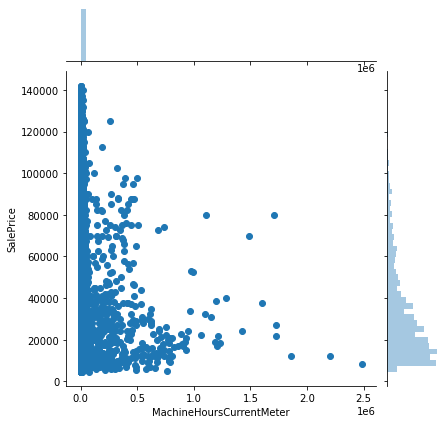

In [48]:
sns.jointplot(x='MachineHoursCurrentMeter',y='SalePrice',data=train)

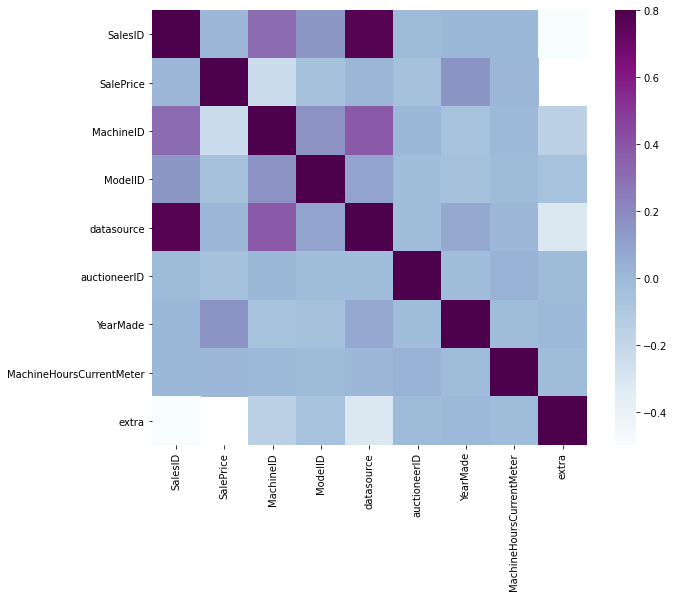

In [49]:
matrix =train.corr() 
f, ax = plt.subplots(figsize=(10, 8)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

In [50]:
train=train.drop('SalesID',1)
train=train.drop('MachineID',1)
train=train.drop('ModelID',1)
train=train.drop('datasource',1)
train=train.drop('fiModelDesc',1)
train=train.drop('fiBaseModel',1)
train=train.drop('fiSecondaryDesc',1)
train=train.drop('fiModelSeries',1)
train=train.drop('fiModelDescriptor',1)
train=train.drop('auctioneerID',1)
train=train.drop('Backhoe_Mounting',1)

In [51]:
train.head()

,SalePrice,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,extra
0,66000.0,2004,68.0,Low,11/16/2006 0:00,NaN,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,1
1,57000.0,1996,4640.0,Low,3/26/2004 0:00,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,23.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,1
2,10000.0,2001,2838.0,High,2/26/2004 0:00,NaN,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,38500.0,2001,3486.0,High,5/19/2011 0:00,Small,"Hydraulic Excavator, Track - 12.0 to 14.0 Metr...",Texas,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,11000.0,2007,722.0,Medium,7/23/2009 0:00,NaN,Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,EROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [52]:
train.shape

(412698, 43)

In [53]:
train.isnull().sum()

SalePrice                    11573
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width                 386715
Enclosure_Type              386715
Engine_Horsepower           386715
Hydraulics                   82565
Pushblock                   386715
Ripper                      305753
Scarifier                   386704
Tip_Control                 386715
Tire_Size                   315060
Coupler             

In [54]:
train['UsageBand'].fillna(train['UsageBand'].value_counts().index[0],inplace=True)
train['ProductSize'].fillna(train['ProductSize'].value_counts().index[0],inplace=True)
train['Drive_System'].fillna(train['Drive_System'].value_counts().index[0],inplace=True)
train['Enclosure'].fillna(train['Enclosure'].value_counts().index[0],inplace=True)
train['Forks'].fillna(train['Forks'].value_counts().index[0],inplace=True)
train['Pad_Type'].fillna(train['Pad_Type'].value_counts().index[0],inplace=True)
train['Ride_Control'].fillna(train['Ride_Control'].value_counts().index[0],inplace=True)
train['Stick'].fillna(train['Stick'].value_counts().index[0],inplace=True)
train['Transmission'].fillna(train['Transmission'].value_counts().index[0],inplace=True)
train['Turbocharged'].fillna(train['Turbocharged'].value_counts().index[0],inplace=True)
train['Blade_Extension'].fillna(train['Blade_Extension'].value_counts().index[0],inplace=True)
train['Enclosure_Type'].fillna(train['Enclosure_Type'].value_counts().index[0],inplace=True)
train['Engine_Horsepower'].fillna(train['Engine_Horsepower'].value_counts().index[0],inplace=True)
train['Hydraulics'].fillna(train['Hydraulics'].value_counts().index[0],inplace=True)
train['Pushblock'].fillna(train['Pushblock'].value_counts().index[0],inplace=True)
train['Ripper'].fillna(train['Ripper'].value_counts().index[0],inplace=True)
train['Scarifier'].fillna(train['Scarifier'].value_counts().index[0],inplace=True)
train['Tip_Control'].fillna(train['Tip_Control'].value_counts().index[0],inplace=True)
train['Tire_Size'].fillna(train['Tire_Size'].value_counts().index[0],inplace=True)
train['Coupler'].fillna(train['Coupler'].value_counts().index[0],inplace=True)
train['Coupler_System'].fillna(train['Coupler_System'].value_counts().index[0],inplace=True)
train['Grouser_Tracks'].fillna(train['Grouser_Tracks'].value_counts().index[0],inplace=True)
train['Hydraulics_Flow'].fillna(train['Hydraulics_Flow'].value_counts().index[0],inplace=True)
train['Track_Type'].fillna(train['Track_Type'].value_counts().index[0],inplace=True)
train['Undercarriage_Pad_Width'].fillna(train['Undercarriage_Pad_Width'].value_counts().index[0],inplace=True)
train['Stick_Length'].fillna(train['Stick_Length'].value_counts().index[0],inplace=True)
train['Thumb'].fillna(train['Thumb'].value_counts().index[0],inplace=True)
train['Pattern_Changer'].fillna(train['Pattern_Changer'].value_counts().index[0],inplace=True)
train['Grouser_Type'].fillna(train['Grouser_Type'].value_counts().index[0],inplace=True)
train['Blade_Type'].fillna(train['Blade_Type'].value_counts().index[0],inplace=True)
train['Travel_Controls'].fillna(train['Travel_Controls'].value_counts().index[0],inplace=True)
train['Differential_Type'].fillna(train['Differential_Type'].value_counts().index[0],inplace=True)
train['Steering_Controls'].fillna(train['Steering_Controls'].value_counts().index[0],inplace=True)

In [55]:
train['Blade_Width'].fillna(train['Blade_Width'].value_counts().index[2],inplace=True)

In [56]:
train['MachineHoursCurrentMeter'].fillna(train['MachineHoursCurrentMeter'].mean(), inplace=True) 

In [57]:
train.isnull().sum()

SalePrice                   11573
YearMade                        0
MachineHoursCurrentMeter        0
UsageBand                       0
saledate                        0
ProductSize                     0
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                    0
Enclosure                       0
Forks                           0
Pad_Type                        0
Ride_Control                    0
Stick                           0
Transmission                    0
Turbocharged                    0
Blade_Extension                 0
Blade_Width                     0
Enclosure_Type                  0
Engine_Horsepower               0
Hydraulics                      0
Pushblock                       0
Ripper                          0
Scarifier                       0
Tip_Control                     0
Tire_Size                       0
Coupler                         0
Coupler_System

In [58]:
train['SalePrice'].fillna(train['SalePrice'].mean(), inplace=True)

In [59]:
train['SalePrice'].isnull().sum()

0

In [60]:
train.describe()

,SalePrice,YearMade,MachineHoursCurrentMeter,extra
count,412698.000000,412698.000000,4.126980e+05,412698.000000
mean,31099.712848,1899.049637,3.522988e+03,0.971958
std,22711.597171,292.190243,1.624326e+04,0.165094
min,4750.000000,1000.000000,0.000000e+00,0.000000
25%,14500.000000,1985.000000,2.418000e+03,1.000000
50%,24500.000000,1995.000000,3.522988e+03,1.000000
75%,39000.000000,2001.000000,3.522988e+03,1.000000
max,142000.000000,2014.000000,2.483300e+06,1.000000


In [61]:
 train.MachineHoursCurrentMeter=np.log(1+train.MachineHoursCurrentMeter)

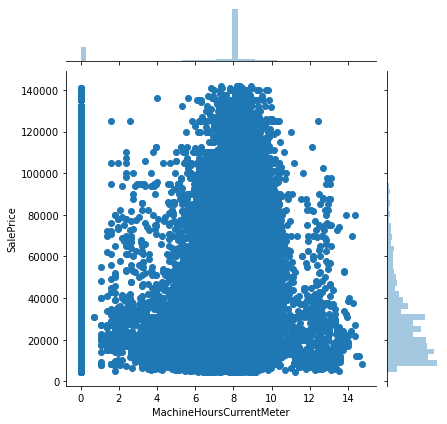

In [62]:
sns.jointplot(x='MachineHoursCurrentMeter',y='SalePrice',data=train)

In [63]:
train_1.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,extra
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,521D,521,D,NaN,NaN,NaN,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,1
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,950FII,950,F,II,NaN,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,23.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,1
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,226,226,NaN,NaN,NaN,NaN,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,PC120-6E,PC120,NaN,-6E,NaN,Small,"Hydraulic Excavator, Track - 12.0 to 14.0 Metr...",Texas,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,S175,S175,NaN,NaN,NaN,NaN,Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,EROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [64]:
train_1 = train_1.drop('extra',1)

In [65]:
from sklearn.preprocessing import LabelEncoder

In [66]:
X = train.drop('SalePrice',1)
y = train.SalePrice

In [67]:
cols = X.columns
X_enc = X.copy()
for col in cols:
    lb = LabelEncoder() 
    X_enc[col] = lb.fit_transform(X[col].values)

In [68]:
train_1 = train.iloc[:401125,:]
valid = train.iloc[401125:,:]

In [69]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_enc, y)

LinearRegression()

In [70]:
lr.score(X_enc,y)

0.38897134000622524

In [71]:
X = valid.drop('SalePrice',1)
y = valid.SalePrice
#taken valid dataset as test data to predict

In [72]:
cols = X.columns
X_enc = X.copy()
for col in cols:
    lb = LabelEncoder() 
    X_enc[col] = lb.fit_transform(X[col].values)

In [73]:
lr.pred = lr.predict(X_enc)

In [74]:
lr.pred

array([22949.05056142, 65474.39117039, 49337.32239042, ...,
       19735.72878537, 19761.20798367, 18091.07594011])

In [75]:
from sklearn.tree import DecisionTreeRegressor

In [76]:
tree = DecisionTreeRegressor()

In [77]:
tree.fit(X_enc,y)

DecisionTreeRegressor()

In [78]:
tree

DecisionTreeRegressor()

In [79]:
tree.pred = tree.predict(X_enc)
tree.pred

array([31099.71284762, 31099.71284762, 31099.71284762, ...,
       31099.71284762, 31099.71284762, 31099.71284762])